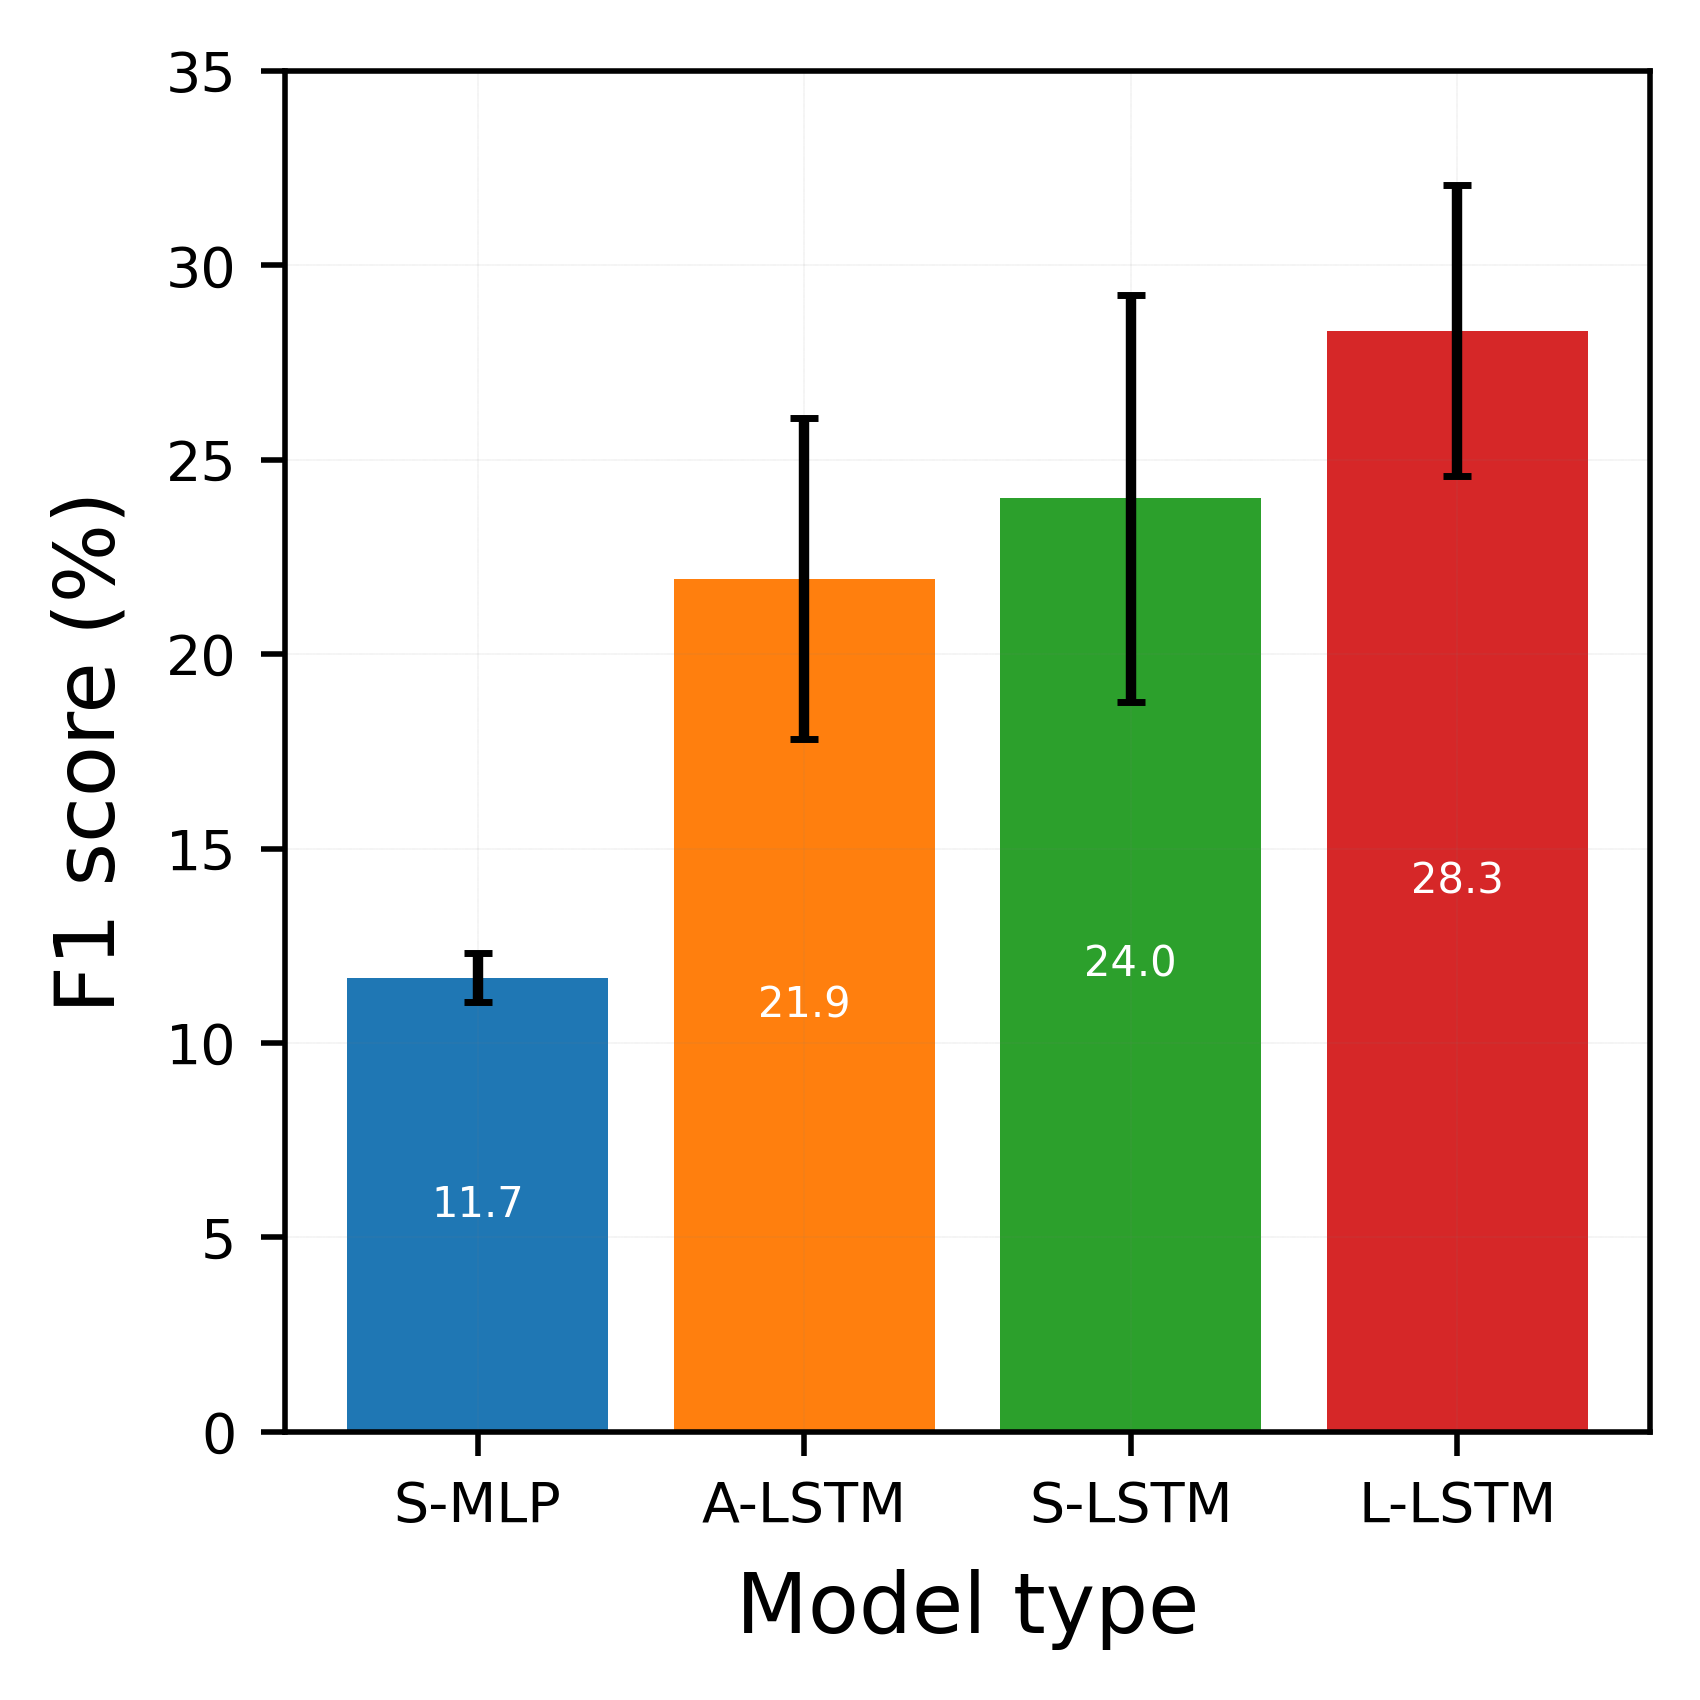

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


model_metrics = {
    # baseline models
    # 'A-MLP' :  [11.18, 12.59, 14.09, 13.89, 11.94],
    "S-MLP" :  [11.24, 11.33, 10.96, 12.45, 12.40],
    
    # our models
    'A-LSTM' :  [19.35, 29.71, 19.48, 18.52, 22.64],
    'S-LSTM' :  [29.11, 25.61, 18.06, 17.61, 29.68],
    'L-LSTM' :  [27.81, 30.95, 26.35, 22.82, 33.68],
}
label_metrics = [f'split_{x}' for x in range(len(model_metrics['S-MLP']))]

# color_map = {
#     'P' : 'k',
#     'S' : 'g',
#     'L' : 'b'
#     }

# marker_map = {
#     'MLP'  : '^',
#     'LSTM' : 'o'
#     }

plt.figure(figsize=(3.5,3.5), dpi = 500, facecolor = 'white')

text_size = 8
tick_size = 8
axis_size = 12
label_size = 6

for idx, model in enumerate(model_metrics):
    metrics = np.array(model_metrics[model])
    mean_value = metrics.mean()
    std_value  = metrics.std()
    
    plt.bar(idx, mean_value, yerr=std_value, align="center", alpha = 1, ecolor = 'black', capsize = 2, label=model)
    plt.text(idx, mean_value/2, mean_value.round(1), color='w', fontsize=label_size, 
             horizontalalignment='center', verticalalignment='center')
    
# Axis labels
labelpad = 5
plt.ylabel('F1 score (%)', fontsize=axis_size, labelpad = labelpad)
plt.yticks(fontsize=tick_size)
plt.ylim(0, 35)

plt.xlabel('Model type', fontsize=axis_size, labelpad = labelpad)
plt.xticks(range(len(model_metrics)), labels=model_metrics.keys(), fontsize=tick_size)
# plt.xlim(*x_lim)

# Plotting points
point_size = 20
alpha = 1
# plt.scatter(0, 0, c = 'k', alpha = 1, s = point_size, marker = 'x', label = 'simple MLP')

# Legend
# plt.legend(borderpad = 0.4, labelspacing = 0.3, fontsize=text_size, edgecolor = '0', facecolor = '1')
plt.grid(True, which='major', axis='both', color = 'gray', linestyle = '--', linewidth = 0.03, zorder = 0)
plt.tight_layout()

plt.savefig('./figures/figure_model_comparison (supple).png')
plt.show()

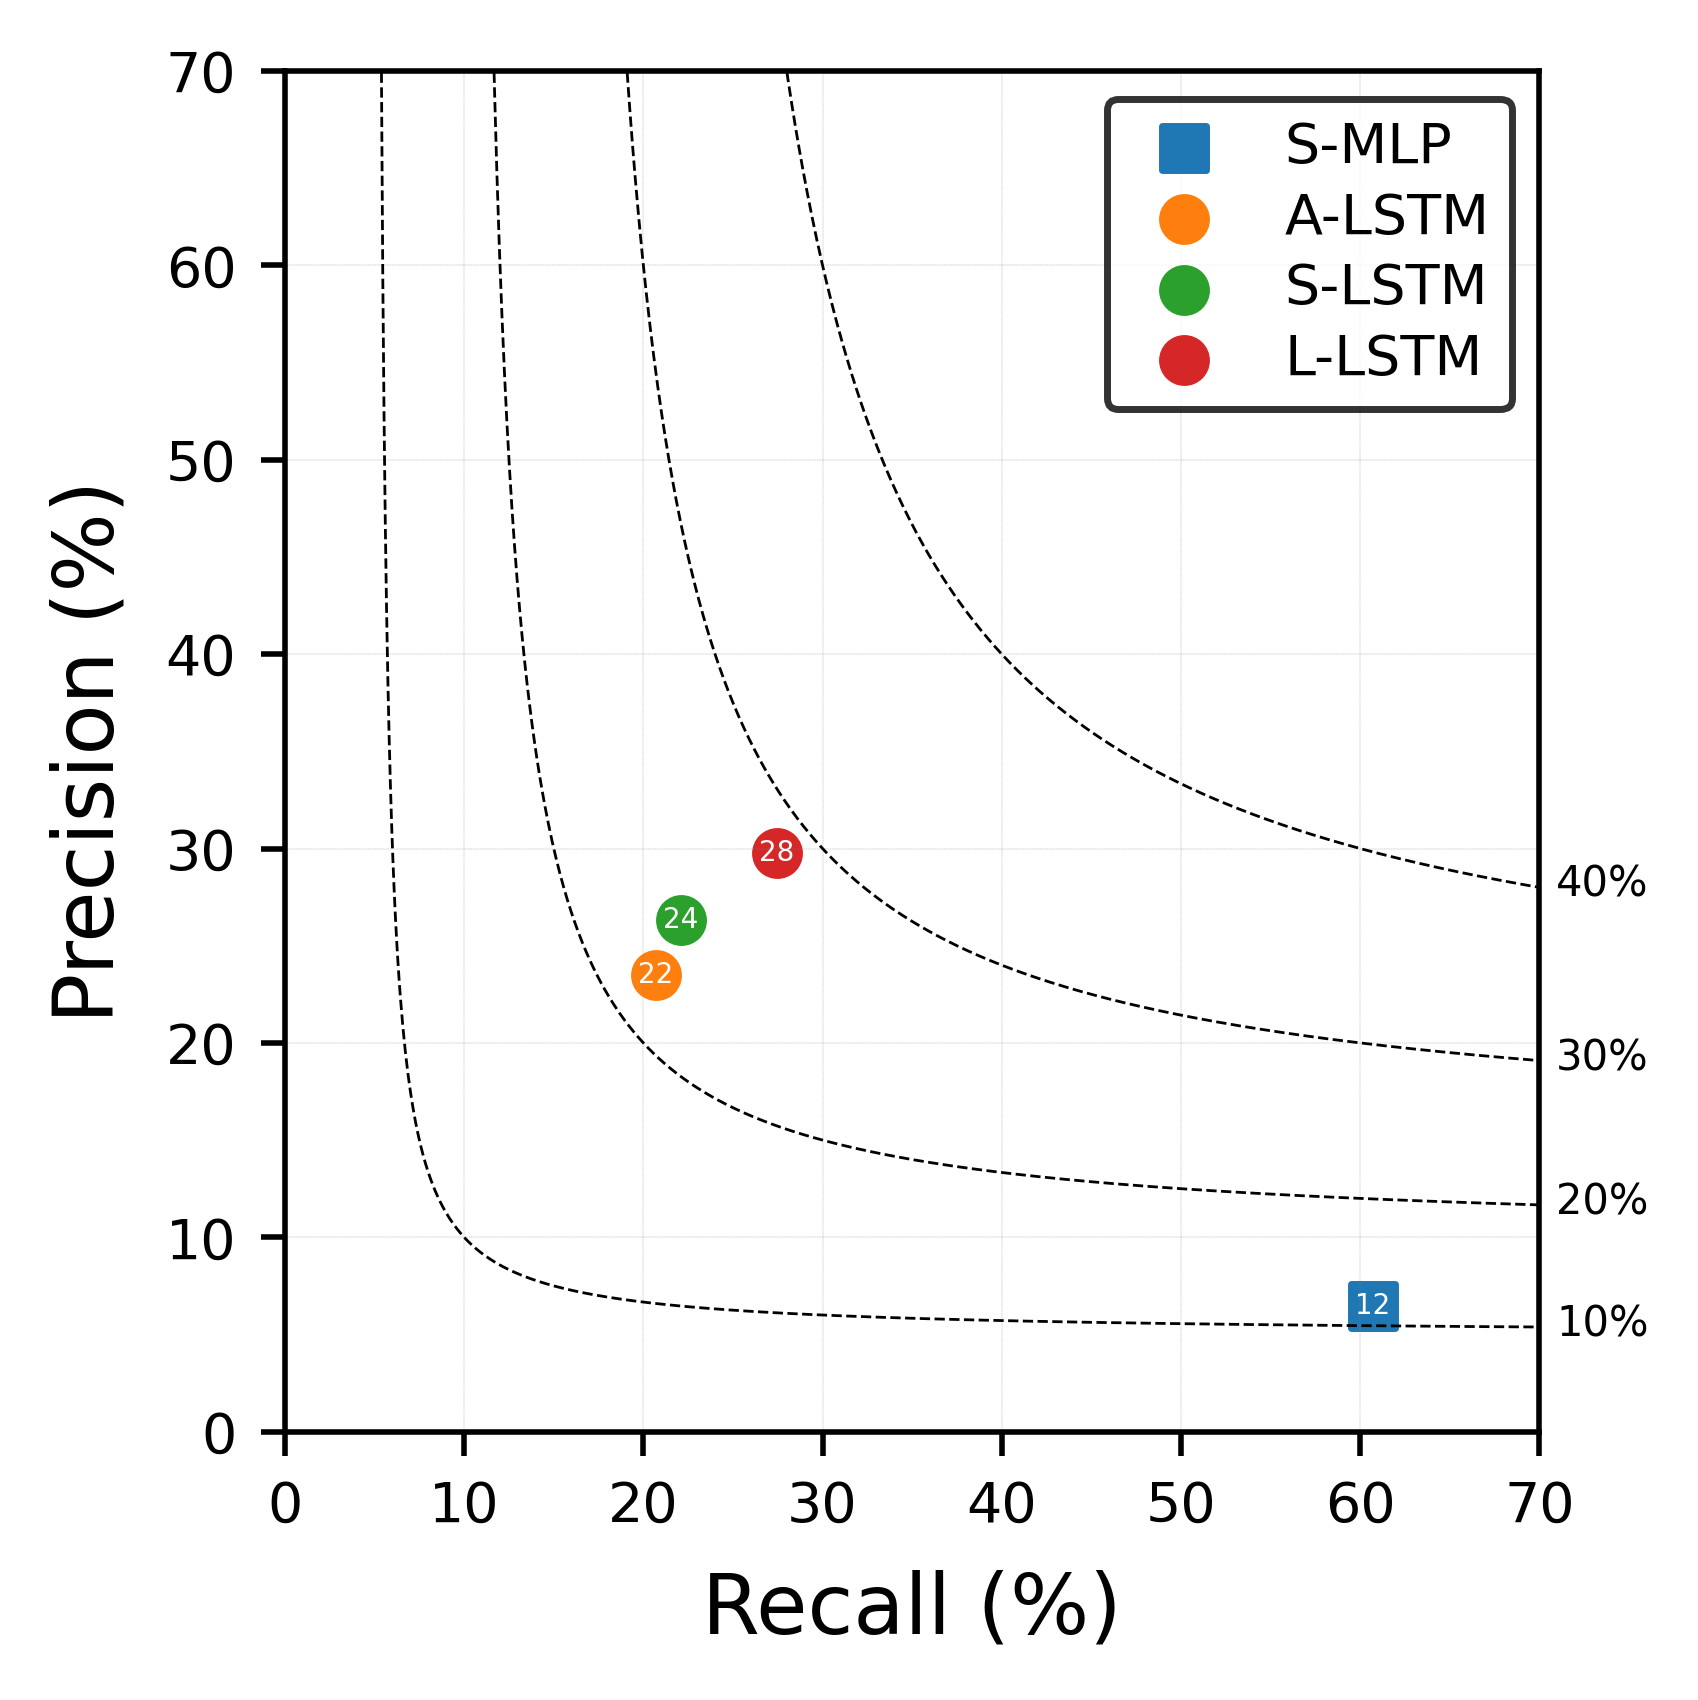

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model_metrics = { # [Precision, Recall, F1-score, F1 std]
    # baseline models
    # 'A-MLP' :  [7.32,  49.30,  12.74,  1.24],
    "S-MLP" :  [6.46,  60.70,  11.68,  0.70],
    
    # our models
    'A-LSTM' :  [23.48, 20.70, 21.94, 4.62],
    'S-LSTM' :  [26.33, 22.09, 24.01, 5.85],
    'L-LSTM' :  [29.79, 27.44, 28.32, 4.18],
}
label_metrics = ['Precision', 'Recall', 'F1-score', 'F1(std)']
df_metrics = pd.DataFrame(model_metrics, index = label_metrics)

    
model_archi = {
    # baseline models
    'A-MLP' :  [None, None, 1, 32],
    "S-MLP" :  [None, None, 5, 64],
    # our models
    'A-LSTM' :  [3, 64, 5, 64],
    'S-LSTM' :  [4, 64, 4, 64],
    'L-LSTM' :  [5, 64, 3, 64],
}
label_archi = ['rnn_layers', 'rnn_neurons', 'dnn_layers', 'dnn_neurons']


color_map = {
    'A' : 'k',
    'S' : 'g',
    'L' : 'b'
    }

marker_map = {
    'MLP'  : 's',
    'LSTM' : 'o'
    }


plt.figure(figsize=(3.5,3.5), dpi = 500, facecolor = 'white')

x_lim = (0, 70)
y_lim = (0, 70)
plt.xlim(*x_lim)
plt.ylim(*y_lim)

text_size = 8
tick_size = 8
axis_size = 12
label_size = 6

# F1 lines
f1_lines = [10, 20, 30, 40]
x = np.linspace(0, x_lim[-1], 1000, endpoint=False)
for f1 in f1_lines:
    y = f1 * x / (2 * x - f1 + 1e-10)
    bound = y > 0
    x_bound = x[bound]
    y_bound = y[bound]

    plt.plot(x_bound, y_bound, color = 'k', linestyle = '--', linewidth=0.4)
    plt.text(x_bound[-1] + 1, y_bound[-1] - 0.5, f'{f1}%', fontsize=label_size)
    
# Axis labels
labelpad = 5
ticks = range(0, 80, 10)
plt.ylabel('Precision (%)', fontsize=axis_size, labelpad = labelpad)
plt.yticks(ticks, fontsize=tick_size)

plt.xlabel('Recall (%)', fontsize=axis_size, labelpad = labelpad)
plt.xticks(ticks, fontsize=tick_size)

# Plotting points
point_size = 40
alpha = 1
# plt.scatter(0, 0, c = 'k', alpha = 1, s = point_size, marker = 'x', label = 'simple MLP')

for model in df_metrics.columns:
    point  = df_metrics[model]
    color  = color_map.get(model.split('-')[0], None)
    marker = marker_map.get(model.split('-')[1], None)
    plt.scatter(point['Recall'], point['Precision'], 
                # c=color, 
                alpha=alpha, 
                s=point_size, 
                marker=marker, 
                label=model)
    plt.text(point['Recall'], point['Precision'], 
             f"{point['F1-score']:.0f}", fontsize = 4, c='w',
             horizontalalignment='center', verticalalignment='center')

# Legend
plt.legend(borderpad = 0.4, labelspacing = 0.3, fontsize=text_size, 
           edgecolor = '0', facecolor = '1', markerscale=1)
plt.tight_layout()

plt.grid(True, which='major', axis='both', color = 'gray', linestyle = '--', linewidth = 0.05, zorder = 0)

plt.savefig('./figures/figure_model comparison (main).png')
plt.show()